In [4]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv("train.csv")

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_Y = train["label"]
train_X = train.drop(columns=["label", ])

In [7]:
train_X.shape

(42000, 784)

In [8]:
train_X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [9]:
# No null values or missing values in the data

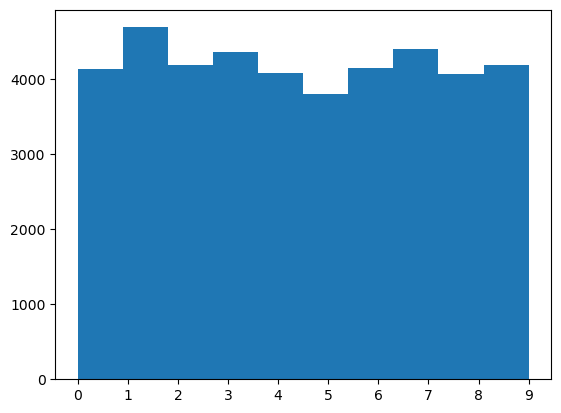

In [10]:
plt.hist(train["label"])
plt.xticks(range(10))
plt.show()

In [11]:
# there are around 4000 of each digit 
# Split the train_X into two parts 41000 for training data
# And 1000 for testing

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(train_X[:41000], train_Y[:41000])

KNeighborsClassifier(n_neighbors=10)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

def cal_acc(model):
    y_pred = model.predict(train_X[41000:])

    print(confusion_matrix(y_pred, train_Y[41000: ]))
    print(accuracy_score(y_pred, train_Y[41000: ]))
    

In [86]:
cal_acc(knn)

[[ 92   0   2   1   0   1   1   0   0   0]
 [  0 127   2   0   2   0   0   1   4   0]
 [  0   0  89   0   0   0   0   1   0   0]
 [  0   0   0  91   0   1   0   0   0   1]
 [  0   0   0   0 108   0   0   1   0   2]
 [  0   0   0   0   0  80   0   0   1   0]
 [  0   0   0   0   1   1 102   0   0   0]
 [  0   0   4   1   0   0   0  98   0   0]
 [  0   0   0   1   0   1   0   0  82   0]
 [  0   0   0   1   0   1   0   0   1  98]]
0.967


c:\Users\reddy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.083)

svm.fit(train_X[:41000], train_Y[:41000])

SVC(C=1.083)

In [96]:
cal_acc(svm)

[[ 90   0   0   1   0   1   1   0   0   0]
 [  0 126   0   0   1   1   0   0   2   0]
 [  0   0  96   0   0   0   0   1   0   0]
 [  0   0   0  92   0   0   0   0   0   1]
 [  0   0   0   0 106   0   0   1   0   2]
 [  0   0   0   0   0  80   0   0   1   0]
 [  1   0   0   0   1   0 102   0   0   0]
 [  0   0   0   1   0   0   0  98   0   2]
 [  1   0   1   0   1   2   0   0  85   0]
 [  0   1   0   1   2   1   0   1   0  96]]
0.971


In [97]:
def predict_model(model):
    test = pd.read_csv("test.csv")
    pred = model.predict(test)

    return pred

In [98]:
pred = predict_model(svm)

In [99]:
def create_test_res(pred) :
    test_res = pd.DataFrame({"ImageId": np.array(range(1, len(pred) + 1)), 
    "Label": pred})

    test_res.to_csv("test_res.csv", index=None)

In [100]:
create_test_res(pred)